In [1]:
import pandas as pd
import numpy as np
!pip install pandas_datareader

In [28]:
df_dework = pd.read_csv('DeWork_finance.csv', encoding = 'latin-1') 
df_parcelops = pd.read_csv('Parcel_transactoins_August_Ops.csv') 
df_community = pd.read_csv('Parcel_transactions_August_Community.csv') 
df_dtech = pd.read_csv('Parcel_transactions_August_dTech.csv') 

In [4]:
print(list(df_dework.columns))
print(list(df_parcelops.columns))
print(list(df_community.columns))
print(list(df_dtech.columns))

['Task ID', 'Task Name', 'Story Point', 'Assignee', 'Wallet', 'Workspace ID', 'Workspace Name', 'Amount', 'Date', 'Token', 'Token Address', 'TxHash', 'SafeTxHash']
['Nonce', 'Incoming/Outgoing', 'Transaction Status', 'Category', 'Recipient Name', 'Token', 'Token Symbol', 'Tag', 'Token Amount', 'USD Amount', 'From Address', 'To Address', 'Description', 'Transaction Hash', 'Executed at', 'Transaction fees', 'Comment']
['Nonce', 'Incoming/Outgoing', 'Transaction Status', 'Category', 'Recipient Name', 'Token', 'Token Symbol', 'Tag', 'Token Amount', 'USD Amount', 'From Address', 'To Address', 'Description', 'Transaction Hash', 'Executed at', 'Transaction fees', 'Comment']
['Nonce', 'Incoming/Outgoing', 'Transaction Status', 'Category', 'Recipient Name', 'Token', 'Token Symbol', 'Tag', 'Token Amount', 'USD Amount', 'From Address', 'To Address', 'Description', 'Transaction Hash', 'Executed at', 'Transaction fees', 'Comment']


In [5]:
guild_map = {'Community Creator Gigs':'Community',
             'Community Experience Squad Open Bounties':'Community',
             'dGov Creator Gigs':'dGov',
            'Aragon Technical Documentation':'dTech',
            'dTech Creator Gigs':'dTech',
            'Finance Creator Gigs':'Eagle Ops',
            'Finance Squad ':'Eagle Ops',
            'Growth Squad Bounties':'Eagle Ops',
            "Operations Guild's Creator Gigs":"Eagle Ops",
            'parcel_community':'Community',
             'parcel_ops':'Eagle Ops',
             'parcel_dtech':'dTech'}

In [6]:
expense_map = {'Core Contributor Rewards':'Core Contributor Rewards',
             'Bounty':'Bounty',
               'Expenses':'Expense',
               'Other':'Other',   
             'Community Creator Gigs':'Bounty',
             'Community Experience Squad Open Bounties':'Bounty',
             'dGov Creator Gigs':'Bounty',
            'Aragon Technical Documentation':'Bounty',
            'dTech Creator Gigs':'Bounty',
            'Finance Creator Gigs':'Bounty',
            'Finance Squad ':'Bounty',
            'Growth Squad Bounties':'Bounty',
            "Operations Guild's Creator Gigs":"Bounty"}

In [7]:
squad_map = {'0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB':'Data Squad',
             '0x62ccd316e91EE0A0448E97251CdfA4dc660F34dc':'Data Squad',
              '0xB5d08d891Ee61775BDDa71C7F5190573868309aE':'Data Squad',
              '0xfE11aB456115186999724725fDf479A9569A641c':'Ops Squad',
              '0x51d93270eA1aD2ad0506c3BE61523823400E114C':'Ops Squad',
               '0xDacf1065b12849298dc5B47EcE9553094000074F':'Finance Squad',
               '0x580e5E54055d087D7F012dD43e54cceaE9ce4265':'Finance Squad',
             '0x7480Fa1a219F548E121F5a8F2bbF81eC61EfC318':'Legal Squad'}

In [29]:
df_dework=df_dework.rename(columns={"Wallet": "To Address", "Amount":"Token Amount", 'Token':'Token Symbol', 
                                    'Workspace Name':'Work Category','Task Name':'Description'})
df_dework['Source']='dework'
# df_dework['Date']=pd.to_datetime(df_dework['Date'])
df_dework['Date']=[row[:10] for row in df_dework['Date']]
df_dework['Date']=pd.to_datetime(df_dework['Date'], format='%Y-%m-%d')
df_dework['Guild'] = df_dework['Work Category'].map(guild_map).fillna('Other')
df_dework['Expense Category'] = df_dework['Work Category'].map(expense_map).fillna('Other')
df_dework['Squad'] = df_dework['To Address'].map(squad_map)

df_parcelops=df_parcelops.rename(columns={"Token": "Token Address", "Executed at":"Date", 'Recipient Name':'Assignee',
                                         'Category':'Work Category'})
df_parcelops['Source']='parcel_ops'
df_parcelops['Date']=[row[:10] for row in df_parcelops['Date']]
df_parcelops['Date']=pd.to_datetime(df_parcelops['Date'], format='%d-%m-%Y')
df_parcelops['Guild'] = df_parcelops['Source'].map(guild_map)
df_parcelops['Expense Category'] = df_parcelops['Work Category'].map(expense_map)
df_parcelops['Squad'] = df_parcelops['To Address'].map(squad_map)

df_community=df_community.rename(columns={"Token": "Token Address", "Executed at":"Date", 'Recipient Name':'Assignee',
                                         'Category':'Work Category'})
df_community['Source']='parcel_community'
df_community['Date']=[row[:10] for row in df_community['Date']]
df_community['Date']=pd.to_datetime(df_community['Date'], format='%d-%m-%Y')
df_community['Guild'] = df_community['Source'].map(guild_map)
df_community['Expense Category'] = df_community['Work Category'].map(expense_map)
df_community['Squad'] = df_community['To Address'].map(squad_map)

df_dtech=df_dtech.rename(columns={"Token": "Token Address", "Executed at":"Date", 'Recipient Name':'Assignee',
                                         'Category':'Work Category'})
df_dtech['Source']='parcel_dtech'
df_dtech['Date']=[row[:10] for row in df_dtech['Date']]
df_dtech['Date']=pd.to_datetime(df_dtech['Date'], format='%d-%m-%Y')
df_dtech['Guild'] = df_dtech['Source'].map(guild_map)
df_dtech['Expense Category'] = df_dtech['Work Category'].map(expense_map)
df_dtech['Squad'] = df_dtech['To Address'].map(squad_map)

In [30]:
print(df_dework['Date'].min())
print(df_parcelops['Date'].min())
print(df_community['Date'].min())
print(df_dtech['Date'].min())

2022-06-16 00:00:00
2022-09-12 00:00:00
2022-09-12 00:00:00
2022-09-12 00:00:00


In [31]:
#!pip install pandas_datareader
import pandas_datareader as web
import datetime as dt

start = dt.datetime(2022,6,16)
end = dt.datetime.now()

ant = web.DataReader('ANT-USD', 'yahoo', start, end)
# ant['Date'] = ant.index
# ant['Date']=pd.to_datetime(ant['Date'], format='%d-%m-%Y')
# ant = ant.reset_index()
ant=ant.rename(columns={"Close": "ANT-USD Price"})
ant_close = ant[{'ANT-USD Price'}]
# ant_close = ant_close.reset_index(drop=True)
ant_close

<ipython-input-31-ebefe9217148>:13: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  ant_close = ant[{'ANT-USD Price'}]


,ANT-USD Price
Date,
2022-06-16,1.594806
2022-06-17,1.572496
2022-06-18,1.568559
2022-06-19,1.688899
2022-06-20,1.606368
...,...
2022-09-20,1.663918
2022-09-21,1.615218
2022-09-22,1.668950


In [32]:
# ant_close.loc['2022-09-12', 'ANT-USD Price']

In [147]:
# list(ant.index)

In [33]:
print(len(df_dework))
print(len(df_parcelops))
print(len(df_community))
print(len(df_dtech))
print(len(df_dework)+len(df_parcelops)+len(df_community)+len(df_dtech))

267
27
23
18
335


In [34]:
df_list = [df_dework, df_parcelops, df_community, df_dtech]
df_combined = pd.concat(df_list) 
df_combined = df_combined.reset_index(drop=True)
print(len(df_combined))

335


In [35]:
conditions = [
    ('2022-06-15'<=df_combined['Date'])&(df_combined['Date'] < '2022-07-15'),
    ('2022-07-15'<=df_combined['Date'])&(df_combined['Date'] < '2022-08-15'),
    ('2022-08-15'<=df_combined['Date'])&(df_combined['Date'] < '2022-09-15'),
    ('2022-09-15'<=df_combined['Date'])&(df_combined['Date'] < '2022-10-15')
]

values = ['June 2022', 'July 2022', 'August 2022', 'September 2022']

df_combined['Report Month'] = np.select(conditions, values)

df_combined.head()

,Task ID,Description,Story Point,Assignee,To Address,Workspace ID,Work Category,Token Amount,Date,Token Symbol,...,Nonce,Incoming/Outgoing,Transaction Status,Tag,USD Amount,From Address,Transaction Hash,Transaction fees,Comment,Report Month
0,b66ac3f3-2bbd-4f77-be7e-4bf3240e927d,Seeking an experienced art/music/culture DAO e...,NaN,jihad.eth,0x70eCe45cDc64A768f936Ccb8aC851578251363e3,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,270.00,2022-07-29,USDC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July 2022
1,b66ac3f3-2bbd-4f77-be7e-4bf3240e927d,Seeking an experienced art/music/culture DAO e...,NaN,jihad.eth,0x70eCe45cDc64A768f936Ccb8aC851578251363e3,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,15.38,2022-07-29,ANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July 2022
2,a39b5ae4-80c4-41d2-825d-601c77ba3fb8,ANT,NaN,Baseballbatman,0xC3DA3DE2746A86a28C562e1B58388C3949ed04Cc,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,15.04,2022-06-19,ANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June 2022
3,d4172188-b0ca-4c0b-ae2e-40113bd10de2,"Translation of ""How to DAO: Answers for Beginn...",2.0,Baseballbatman,0xC3DA3DE2746A86a28C562e1B58388C3949ed04Cc,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,180.00,2022-06-19,USDC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June 2022
4,203b33fd-c2e5-48d1-92a4-4f9a42b50b5d,Seeking an experienced investment DAO expert,NaN,hirsh1,0xbA88168Abd7E9d53A03bE6Ec63f6ed30d466C451,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,17.14,2022-07-21,ANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July 2022


In [36]:
df_combined['Final Payment USD'] = 0.0

In [37]:
for ind in df_combined.index:
    if df_combined['Token Symbol'].iat[ind] == 'USDC':
        df_combined['Final Payment USD'].iat[ind] = (df_combined['Token Amount'].iat[ind]*1).round(2)

    else:
        df_combined['Final Payment USD'].iat[ind] = (df_combined['Token Amount'].iat[ind]*
                                                     ant_close.loc[df_combined['Date'].iat[ind], 'ANT-USD Price']).round(2)

In [38]:
# list(df_combined.columns)
df_combined.head()

,Task ID,Description,Story Point,Assignee,To Address,Workspace ID,Work Category,Token Amount,Date,Token Symbol,...,Incoming/Outgoing,Transaction Status,Tag,USD Amount,From Address,Transaction Hash,Transaction fees,Comment,Report Month,Final Payment USD
0,b66ac3f3-2bbd-4f77-be7e-4bf3240e927d,Seeking an experienced art/music/culture DAO e...,NaN,jihad.eth,0x70eCe45cDc64A768f936Ccb8aC851578251363e3,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,270.00,2022-07-29,USDC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July 2022,270.00
1,b66ac3f3-2bbd-4f77-be7e-4bf3240e927d,Seeking an experienced art/music/culture DAO e...,NaN,jihad.eth,0x70eCe45cDc64A768f936Ccb8aC851578251363e3,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,15.38,2022-07-29,ANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July 2022,30.72
2,a39b5ae4-80c4-41d2-825d-601c77ba3fb8,ANT,NaN,Baseballbatman,0xC3DA3DE2746A86a28C562e1B58388C3949ed04Cc,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,15.04,2022-06-19,ANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June 2022,25.40
3,d4172188-b0ca-4c0b-ae2e-40113bd10de2,"Translation of ""How to DAO: Answers for Beginn...",2.0,Baseballbatman,0xC3DA3DE2746A86a28C562e1B58388C3949ed04Cc,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,180.00,2022-06-19,USDC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,June 2022,180.00
4,203b33fd-c2e5-48d1-92a4-4f9a42b50b5d,Seeking an experienced investment DAO expert,NaN,hirsh1,0xbA88168Abd7E9d53A03bE6Ec63f6ed30d466C451,4e848cab-08db-4fd2-9110-b6540b34eee4,Operations Guild's Creator Gigs,17.14,2022-07-21,ANT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,July 2022,30.49


In [46]:
df_combined_select = df_combined[['Report Month','Guild', 'Expense Category', 'Work Category', 'Squad', 'Date', 
                                 'Description', 'Assignee', 'Final Payment USD','Token Amount', 'Token Symbol', 
                                 'Incoming/Outgoing', 'To Address', 'Source']] #removed 'ANT-USD Price',


In [47]:
df_combined_final = df_combined_select.sort_values(by=['Report Month', 'Guild', 'Expense Category', 
                                  'Work Category', 'Squad', 'Date'])
df_combined_final = df_combined_final.reset_index(drop=True)

In [48]:
df_combined_final.to_csv('df_combined_final_final_.csv')

In [200]:

df_expense = pd.read_csv('df_combined_final_final_expense.csv') 

In [55]:
df_expense.head()

,Unnamed: 0,Report Month,Guild,Expense Category,Work Category,Squad,Date,Expense Sub Category,Description,Assignee,Final Payment USD,Token Amount,Token Symbol,Incoming/Outgoing,To Address,Source
0,0,Aug-22,Community,Bounty,Bounty,Data Squad,9/12/2022,NaN,Bounty payments August + first week of September,NaN,225.00,225.000000,USDC,Outgoing,0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB,parcel_community
1,1,Aug-22,Community,Bounty,Bounty,Data Squad,9/12/2022,NaN,Bounty payments August + first week of September,NaN,25.92,13.440860,ANT,Outgoing,0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB,parcel_community
2,2,Aug-22,Community,Bounty,Bounty,NaN,9/12/2022,NaN,Bounty payments August + first week of September,FMurphy#8381,385.70,200.000000,ANT,Outgoing,0xdF2B0B3A8db9D5DDb285bD26D296f9D78CA4cF7f,parcel_community
3,3,Aug-22,Community,Bounty,Bounty,NaN,9/12/2022,NaN,Bounty payments August + first week of September,NaN,103.68,53.763441,ANT,Outgoing,0x476ECEe2dE6E667e0CD5a8CaFF49e9e8926c11Eb,parcel_community
4,4,Aug-22,Community,Bounty,Bounty,NaN,9/12/2022,NaN,Bounty payments August + first week of September,NaN,900.00,900.000000,USDC,Outgoing,0x476ECEe2dE6E667e0CD5a8CaFF49e9e8926c11Eb,parcel_community


In [201]:
df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique()

array(['TBD', 'Community Development & Support',
       'Salaries and other compensation',
       'Treasury & Finance Management ', 'Reporting & Insights',
       'DAO education', 'Governance Development & Support',
       'Tech Support', 'Miscellaneous'], dtype=object)

In [69]:
df_expense[(df_expense['Incoming/Outgoing']!='Incoming')&
           (df_expense['Expense Sub Category']=='Community Development & Support')]

,Unnamed: 0,Report Month,Guild,Expense Category,Work Category,Squad,Date,Expense Sub Category,Description,Assignee,Final Payment USD,Token Amount,Token Symbol,Incoming/Outgoing,To Address,Source
5,5,Sep-22,Community,Bounty,Community Creator Gigs,Data Squad,9/12/2022,Community Development & Support,Self Care with Fabs - August,Fabs,NaN,NaN,ANT,NaN,0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB,dework
6,6,Sep-22,Community,Bounty,Community Creator Gigs,Data Squad,9/12/2022,Community Development & Support,Self Care with Fabs - August,Fabs,NaN,NaN,USDC,NaN,0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB,dework
7,7,Sep-22,Community,Bounty,Community Creator Gigs,NaN,9/12/2022,Community Development & Support,Discord Introductions & Discussion,kndlexi,103.68,53.76,ANT,NaN,0x476ECEe2dE6E667e0CD5a8CaFF49e9e8926c11Eb,dework
8,8,Sep-22,Community,Bounty,Community Creator Gigs,NaN,9/12/2022,Community Development & Support,Discord Introductions & Discussion,kndlexi,900.00,900.00,USDC,NaN,0x476ECEe2dE6E667e0CD5a8CaFF49e9e8926c11Eb,dework
9,9,Sep-22,Community,Bounty,Community Creator Gigs,NaN,9/12/2022,Community Development & Support,Layer3 Contests,FMurphy,NaN,NaN,ANT,NaN,0xdF2B0B3A8db9D5DDb285bD26D296f9D78CA4cF7f,dework
10,10,Aug-22,Community,Bounty,Community Experience Squad Open Bounties,Data Squad,8/17/2022,Community Development & Support,Self Care with Fabs,Fabs,NaN,NaN,USDC,NaN,0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB,dework
11,11,Aug-22,Community,Bounty,Community Experience Squad Open Bounties,Data Squad,8/17/2022,Community Development & Support,Self Care with Fabs,Fabs,NaN,NaN,ANT,NaN,0xbF0f24fD34bC76CD6d8Eb37cc99d4477ed3a98FB,dework
12,12,Aug-22,Community,Bounty,Community Experience Squad Open Bounties,NaN,8/17/2022,Community Development & Support,AMA Coordination,temitope,NaN,NaN,USDC,NaN,0x17374EAF27D2646Cd39399f41bE3Bf95b4b997A9,dework
13,13,Aug-22,Community,Bounty,Community Experience Squad Open Bounties,NaN,8/17/2022,Community Development & Support,AMA Coordination,temitope,NaN,NaN,ANT,NaN,0x17374EAF27D2646Cd39399f41bE3Bf95b4b997A9,dework
92,92,Sep-22,dGov,Bounty,dGov Creator Gigs,NaN,9/12/2022,Community Development & Support,AUG Community Call,louisa,NaN,NaN,USDC,NaN,0x80221B357685A45F83DEAe0216E01421993C9485,dework


In [66]:
df_expense['Report Month'].unique()

array(['Aug-22', 'Sep-22', 'Jul-22', 'Jun-22'], dtype=object)

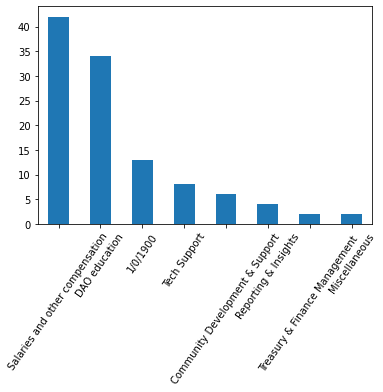

In [84]:
import matplotlib.pyplot as plt
df_expense[(df_expense['Report Month']=='Sep-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].value_counts().plot(kind='bar', rot=55)
df_expense[(df_expense['Report Month']=='Aug-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].value_counts().plot(kind='bar', rot=55)

In [202]:
sep = df_expense[(df_expense['Report Month']=='Sep-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].value_counts()

aug = df_expense[(df_expense['Report Month']=='Aug-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].value_counts()

july = df_expense[(df_expense['Report Month']=='Jul-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].value_counts()

june = df_expense[(df_expense['Report Month']=='Jun-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].value_counts()

In [91]:
df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique()

array(['TBD', 'Community Development & Support',
       'Salaries and other compensation',
       'Treasury & Finance Management ', 'Reporting & Insights',
       'DAO education', 'Governance Development & Support',
       'Tech Support', 'Recruting', 'Miscellaneous'], dtype=object)

In [203]:

sep_whole = []
for i in df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique():
    if i in df_expense[(df_expense['Report Month']=='Sep-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].unique():
        sep_whole.append(sep[i])
    else:
        sep_whole.append(0)
        
aug_whole = []
for i in df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique():
    if i in df_expense[(df_expense['Report Month']=='Aug-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].unique():
        aug_whole.append(aug[i])
    else:
        aug_whole.append(0)
        
july_whole = []
for i in df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique():
    if i in df_expense[(df_expense['Report Month']=='Jul-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].unique():
        july_whole.append(july[i])
    else:
        july_whole.append(0)
        
june_whole = []
for i in df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique():
    if i in df_expense[(df_expense['Report Month']=='Jun-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].unique():
        june_whole.append(june[i])
    else:
        june_whole.append(0)

In [122]:
aug_whole

[20, 6, 42, 2, 4, 34, 0, 8, 0, 2]

In [114]:
df_expense[(df_expense['Report Month']=='Aug-22')&
           (df_expense['Incoming/Outgoing']!='Incoming')]['Expense Sub Category'].unique()

array(['TBD', 'Community Development & Support',
       'Salaries and other compensation',
       'Treasury & Finance Management ', 'Reporting & Insights',
       'DAO education', 'Tech Support', 'Miscellaneous'], dtype=object)

In [189]:
july

Governance Development & Support    38
DAO education                       27
Miscellaneous                       26
Community Development & Support     25
Treasury & Finance Management       10
Tech Support                         6
Recruting                            4
Reporting & Insights                 4
Name: Expense Sub Category, dtype: int64

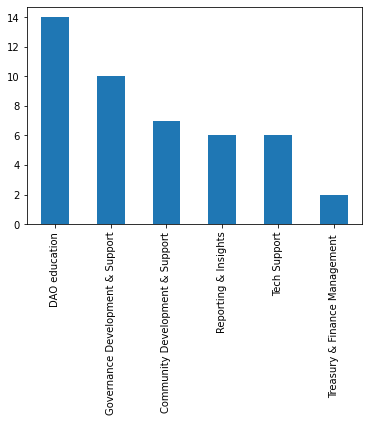

In [94]:
sep.plot(kind='bar')

In [162]:
# import matplotlib 
import matplotlib as plt
plt.__version__

'3.2.2'

In [158]:
!pip install matplotlib==3.4.1

ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\kimsa\\anaconda3\\Lib\\site-packages\\matplotlib\\ft2font.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.0
    Uninstalling matplotlib-3.6.0:
      Successfully uninstalled matplotlib-3.6.0
  Rolling back uninstall of matplotlib
  Moving to c:\users\kimsa\appdata\roaming\python\python38\site-packages\
   from C:\Users\kimsa\AppData\Roaming\Python\Python38\~ite-packages


In [174]:
# !pip install matplotlib --upgrade --user

In [175]:
july_whole

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

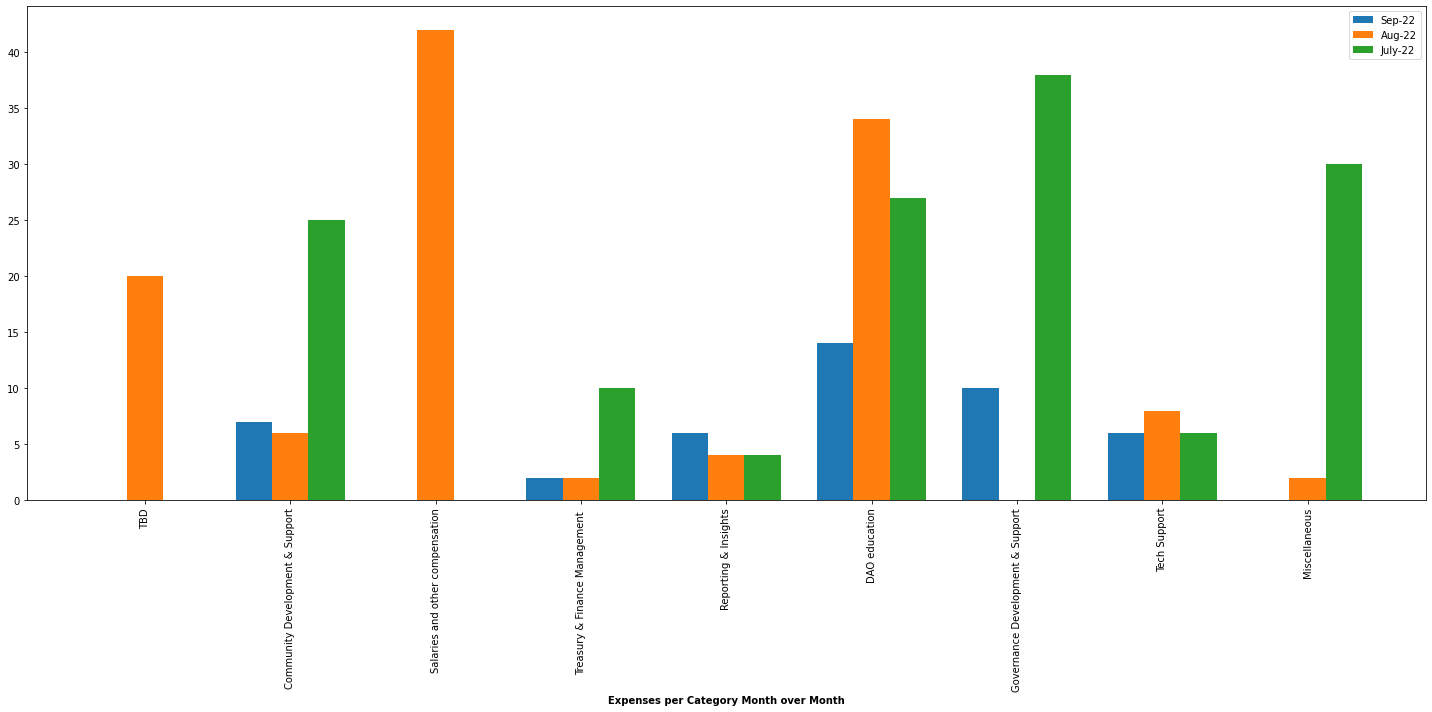

In [221]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20, 10)
# plt.rcParams["figure.autolayout"] = True
# labels = df_expense[df_expense['Incoming/Outgoing']!='Incoming']['Expense Sub Category'].unique()
labels = ['TBD', 'Community Development & Support', 'Salaries and other compensation',
 'Treasury & Finance Management ', 'Reporting & Insights', 'DAO education',
 'Governance Development & Support' ,'Tech Support',
 'Miscellaneous']


# Set position of bar on X axis
barWidth = 0.25  # the width of the bars
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# r4 = [x + width for x in r3]

fig, ax = plt.subplots()
rects1 = ax.bar(r1, sep_whole, width=barWidth, label='Sep-22',align='center')
rects2 = ax.bar(r2, aug_whole, width=barWidth, label='Aug-22',align='center')
rects3 = ax.bar(r3, july_whole, width=barWidth, label='July-22',align='center')
# rects4 = ax.bar(r4, june_whole, width=width, label='June-22',align='center')

# Add xticks on the middle of the group bars
plt.xlabel('Expenses per Category Month over Month', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sep_whole))], labels, rotation=90)
 
# Create legend & Show graphic
plt.legend()
plt.show()




# # Add some text for labels, title and custom x-axis tick labels, etc.
# ax.set_ylabel('Count of Payments')
# ax.set_title('Expenses per Category Month over Month')
# ax.set_xticks(x)
# ax.set_xticklabels(labels, rotation=90)
# ax.legend()

# # ax.set_xticks(x, labels)
# # ax.legend()

# # ax.bar_label(rects1, padding=3)
# # ax.bar_label(rects2, padding=3)

# # fig.tight_layout()

# plt.show()

# change the date range, rerun and compare the final report vs. last August report

# then create a report format, confirm with Rick, and create Streamlit (maybe?)

In [144]:
# df_combined_final = df_combined_final[(df_combined_final['Report Month']=='August 2022') & (~df_combined_final['Guild'].isnull())]

In [211]:
# august = df_combined_final[(df_combined_final['Report Month']=='August 2022') & (~df_combined_final['Guild'].isnull())]
# august['Guild'].unique()
# df_combined[('2022-08-15'<=df_combined['Date'])&(df_combined['Date'] < '2022-09-15')]
# df_combined[(df_combined['Final Payment USD'].isnull()) & (~df_combined['Token Amount'].isnull())]
# df_combined_ = df_combined.groupby(['Report Month', 'Category'])
# df_combined_ = df_combined.groupby(['Report Month'])
# df_combined_.first()

In [45]:
# df_combined.to_csv('df_combined_chk_.csv')

In [213]:
# ant.loc['2020-01-01', 'Close']

In [212]:
# df_combined[df_combined['Date']>'2022-08-15']